# Problem Statement : Lead Scoring Case Study for X Education #

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

This case study is carried out to help X Education to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the Case Study

1. Build a ***logistic regression model*** to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well. These problems are provided in a separate doc file, which will be filled post *model intepretations*.

##### Target Variable - Converted, which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

### 1: Reading and Understanding the Data¶

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing sklearn libraries for model build
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Loading the datatset
leads=pd.read_csv("Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
#Checking the Dimension of the dataframe and type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

> - The data provided has **9240 data points** with few attributes/columns having missing values.
> - There are 30 categorical variables and 7 numeric columns

In [6]:
# Checking the stats of the dataframe
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Checking for null values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

> - There are null/missing values in many columns
> - As suggested in the platform, there could be few attributes which may or may not be useful in ultimately deciding whether a lead will be converted or not. Also, as per the data dictionary shared, the levels of the categorical variables are different and **many of the categorical variables have a level called 'Select' which needs to be handled.** This will be handled in next step

### 2: Data Cleansing and Pre-processing

#### 2A: Replacing 'Select 'values where customer has not selected anything with missing

In [8]:
# Replacing 'Select' with blanks/NaN for columns :
# Specialization,How did you hear about X Education,Lead Profile,City
# These values are appearing most likely because the customer did not select anything from the drop down while browing through the site

leads_final=leads.replace('Select',np.nan)

#### 2B: Dropping unwanted columns

> Below 3 columns have no null values and only 1 unique value of 'No'. This won't contribute much to the final prediction
> - Get updates on DM Content
> - Update me on Supply Chain Content
> - I agree to pay the amount through cheque
> - Magazine

In [9]:
# Dropping unwanted categorical columns
leads_final= leads_final.drop(['Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Magazine'],axis=1)

> Prospect ID and Lead Number are both unique for each row. Dropping Prospect ID as only one unique ID would be required

In [10]:
#Dropping Prospect ID
leads_final=leads_final.drop(['Prospect ID'],axis=1)

#### 2C: Treating missing values in each column

In [11]:
# Checking the null values in new dataset
leads_final.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

> Majority values in below columns are null and we will drop these columns as nulls can mislead the model while traning and won't give accurate test values:
> - How did you hear about X Education
> - Lead Profile
> - Lead Quality
> - Asymmetrique Activity Index
> - Asymmetrique Profile Index 
> - Asymmetrique Activity Score
> - Asymmetrique Profile Score 

In [12]:
leads_final=leads_final.drop(['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1)

In [13]:
#Checking final dataset
leads_final.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses     NaN   
1                      No                              Ringing     NaN   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 24 columns]

In [14]:
# Checking the null value % in new dataset
round((leads_final.isnull().sum()/len(leads_final.index))*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

> *There are still columns with >30% missing values. Checking columns `Specialization` , `Tags`, `What is your current occupation`, `City`,`Country`,`What matters most to you in choosing a course` separately for missing values*

---------------------------------------------------------------

In [15]:
# Specialization column:
leads_final.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

> Best is to update the missing values with ***'Others'*** as either the lead is a student/unemployed person or missed to fill this

In [16]:
leads_final['Specialization']=leads_final['Specialization'].replace(np.nan,'Other')

In [17]:
#Checking the new dataframe
leads_final.Specialization.describe()

count      9240
unique       19
top       Other
freq       3380
Name: Specialization, dtype: object

---------------------------------------------------------------

In [18]:
# Tags column:
leads_final.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

> - As per the data dictionary shared, this column indicates the current status of the lead. This would be decided and assigned by the sales and marketing team of X Education after discussions with the customer. Hence, it is not a static variable which can be assigned with the most common value but also cannot be dropped as the lead status could be an critical indicator if the lead will get converted or not.
> - Best is to assign ***Other*** to missing values

In [19]:
leads_final['Tags']=leads_final['Tags'].replace(np.nan,'Other')

In [20]:
#Checking the new dataframe
leads_final.Tags.describe()

count      9240
unique       27
top       Other
freq       3353
Name: Tags, dtype: object

---------------------------------------------------------------

In [21]:
# City column:
leads_final.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
leads_final.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

> Geographies from where the customer came out as a lead cannot be a straight forward update/guess. Hence, best is to update the missing values with 'NA'

In [23]:
leads_final['City']=leads_final['City'].replace(np.nan,'NA')

In [24]:
#Checking the new dataframe
leads_final.City.describe()

count     9240
unique       7
top         NA
freq      3669
Name: City, dtype: object

---------------------------------------------------------------

In [25]:
#Country column
leads_final.Country.value_counts()
#print(6492/9240)

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
leads_final.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

> Since 70% entries are from India, it is reasonable to assume that the leads are also from India. This maked this variable very skewed to one value and hence, we can drop it from the final modelling base as it won't make much effect

In [27]:
leads_final=leads_final.drop('Country',axis=1)

In [28]:
#Checking new dataset
leads_final.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses      NA   
1                      No                              Ringing      NA   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 23 columns]

---------------------------------------------------------------

In [29]:
# What matters most to you in chossing a course column:
leads_final['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
leads_final['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

> It is very clear that majority people who have filled this information, have chosen X Education for a better career trajectory and makes it an attribute highly skewed to this value only. Hence, it is better to drop this column from the modelling base

In [31]:
leads_final=leads_final.drop('What matters most to you in choosing a course',axis=1)

In [32]:
#Checking the new dataframe
leads_final.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses      NA   
1                      No                              Ringing      NA   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 22 columns]

---------------------------------------------------------------

In [33]:
# What is your current occupation column:
leads_final['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [34]:
leads_final['What is your current occupation'].value_counts()
#print(5600/9240)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

> Around 60% audience is *`Unemployed`*. Hence, we can impute nan values by the same

In [35]:
leads_final['What is your current occupation'] = leads_final['What is your current occupation'].replace(np.nan, 'NA')

In [36]:
#Checking new dataframe
leads_final['What is your current occupation'].value_counts()

Unemployed              5600
NA                      2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

---------------------------------------------------------------

In [37]:
#Checking the missing values in all columns again:
round((leads_final.isnull().sum()/len(leads_final.index))*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable 

In [38]:
leads_final.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses      NA   
1                      No                              Ringing      NA   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 22 columns]

> We can drop the records with na as it is <2% now.

In [39]:
#Taking backup to store steps covered till now
leads_base=leads_final

In [40]:
leads_base.dropna(inplace=True)

In [41]:
leads_base.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses      NA   
1                      No                              Ringing      NA   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 22 columns]

In [42]:
#Checking missng values in final dataset
round(((leads_base.isnull().sum())/len(leads_base.index))*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

### 3: Visualizing and Inspecting the Data

#### 3A: Checking Current Lead Conversion Rate 

In [43]:
# Checking the Lead Conversion Rate before pre-processing in original dataset

conversion_rate_initial=round((sum(leads['Converted'])/len(leads['Converted'].index))*100,2)
print('Lead Conversion Rate before data pre-processing is :',conversion_rate_initial,'%')

Lead Conversion Rate before data pre-processing is : 38.54 %


In [44]:
# Confirming the same range for Lead Conversion Rate after pre-processing in final dataset

conversion_rate_final=round((sum(leads_base['Converted'])/len(leads_base['Converted'].index))*100,2)
print('Lead Conversion Rate after data pre-processing is :',conversion_rate_final,'%')

Lead Conversion Rate after data pre-processing is : 37.86 %


In [45]:
leads_base.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations                                 Tags    City  \
0                      No          Interested in other courses      NA   
1                      No                              Ringing      NA   
2                      No  Will revert after reading the email  Mumbai   
3                      No                              Ringing  Mumbai   
4                      No  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 22 columns]

#### 3C: Categorical Variables

**Lead Conversion v/s Lead Origin**

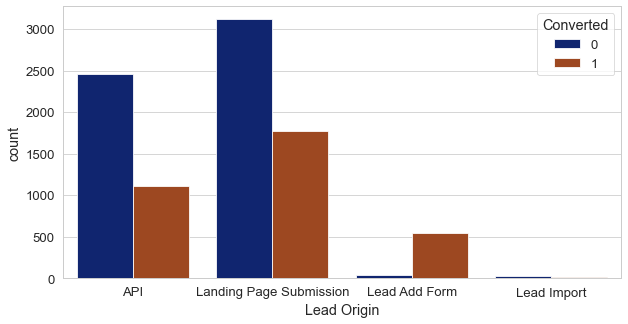

In [46]:
sns.set_style('whitegrid')
sns.set_context('paper',font_scale = 1.5)
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Origin', hue='Converted',data=leads_base,palette='dark')
plt.show()

In [47]:
summary=leads_base[["Converted", "Lead Origin"]].value_counts(sort=False).reset_index()
summary

Converted              Lead Origin     0
0          0                      API  2463
1          0  Landing Page Submission  3118
2          0            Lead Add Form    37
3          0              Lead Import    21
4          1                      API  1115
5          1  Landing Page Submission  1767
6          1            Lead Add Form   544
7          1              Lead Import     9

**Lead Conversion v/s Lead Source**

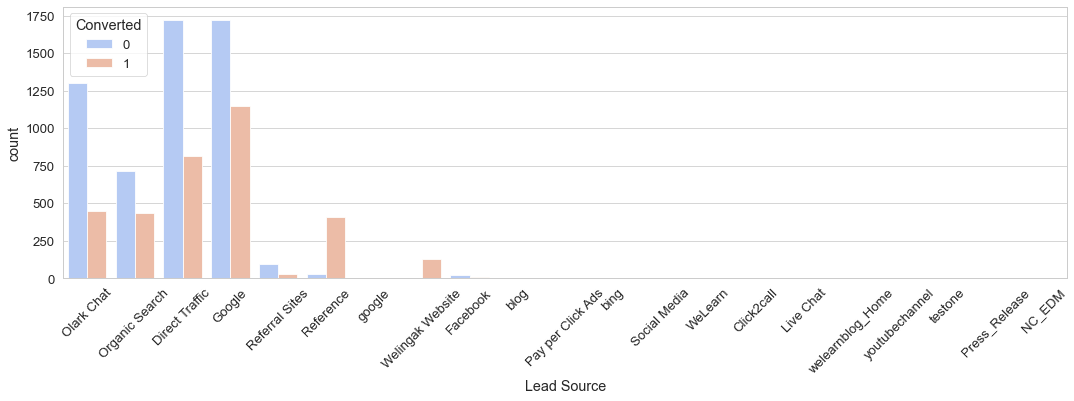

In [48]:
sns.set_style('whitegrid')
sns.set_context('paper',font_scale = 1.5)
plt.figure(figsize=(18,5))
sns.countplot(x='Lead Source', hue='Converted',data=leads_base,palette='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [49]:
print(leads_base[["Converted", "Lead Source"]].value_counts(sort=True, normalize=True).reset_index())

    Converted        Lead Source         0
0           0     Direct Traffic  0.190104
1           0             Google  0.189663
2           0         Olark Chat  0.143818
3           1             Google  0.126405
4           1     Direct Traffic  0.090148
5           0     Organic Search  0.079127
6           1         Olark Chat  0.049372
7           1     Organic Search  0.048049
8           1          Reference  0.045184
9           1   Welingak Website  0.013996
10          0     Referral Sites  0.010359
11          0          Reference  0.003637
12          1     Referral Sites  0.003416
13          0           Facebook  0.002425
14          1           Facebook  0.000992
15          0               bing  0.000551
16          0             google  0.000551
17          1         Click2call  0.000331
18          0   Welingak Website  0.000220
19          0      Press_Release  0.000220
20          1          Live Chat  0.000220
21          1       Social Media  0.000110
22         

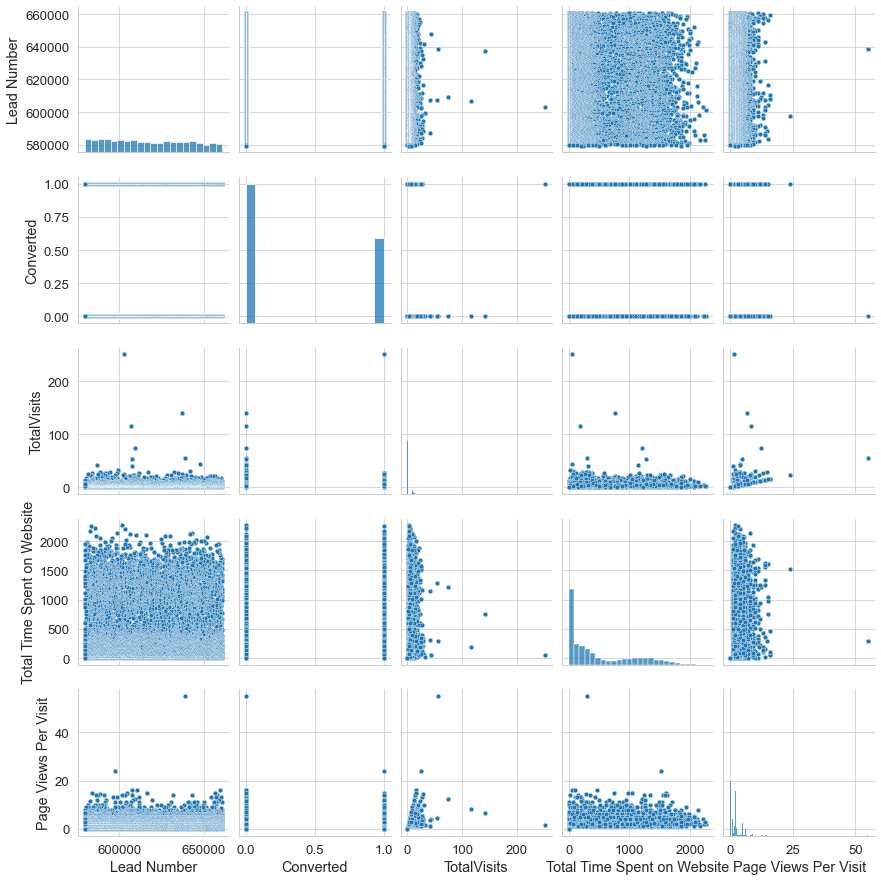

In [50]:
sns.pairplot(leads_base)

<AxesSubplot:>

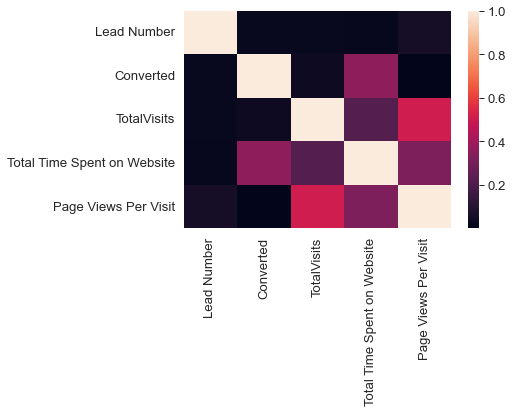

In [51]:
sns.heatmap(leads_base.corr())

In [52]:
columns =  ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

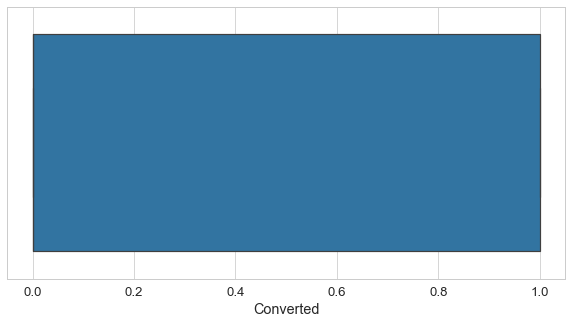

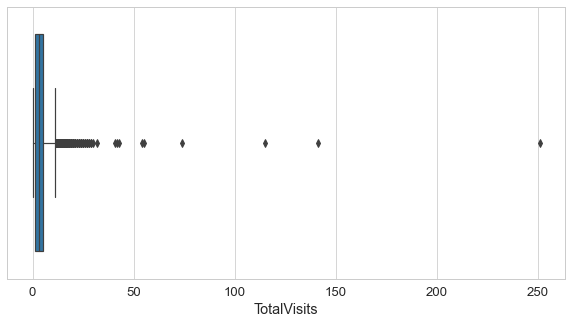

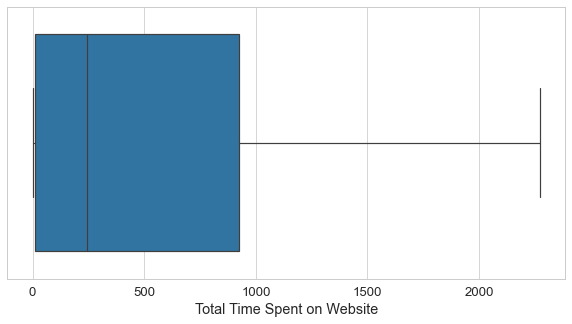

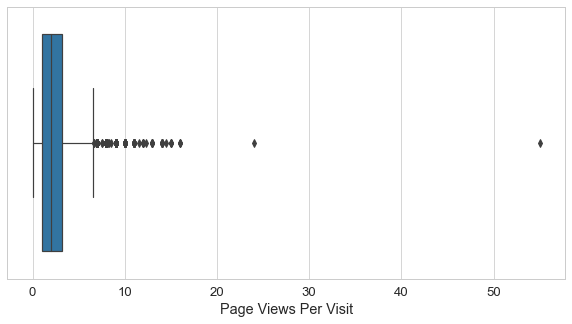

In [53]:
for i in columns:
    plt.figure(figsize=[10,5])
    sns.boxplot(leads_base[i])
    plt.show()

### It seems that pages views per visit and total visit has some outliers, and we need to treat these.

### Visualising categorical variables

In [54]:
leads_base_0 = leads_base[leads_base['Converted']==0]
leads_base_1 = leads_base[leads_base['Converted']==1]

In [55]:
obj_col = []
for i in leads_base.columns:
    if leads_base[i].dtype == 'object':
        obj_col.append(i)
obj_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

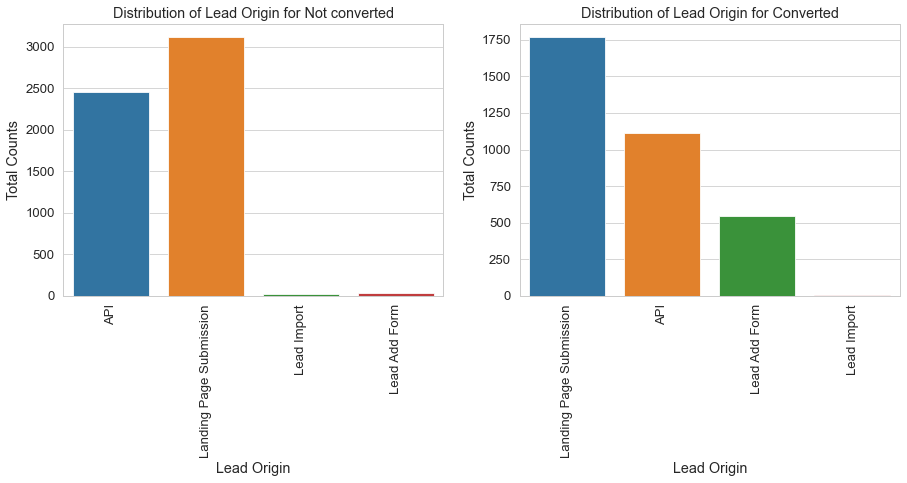

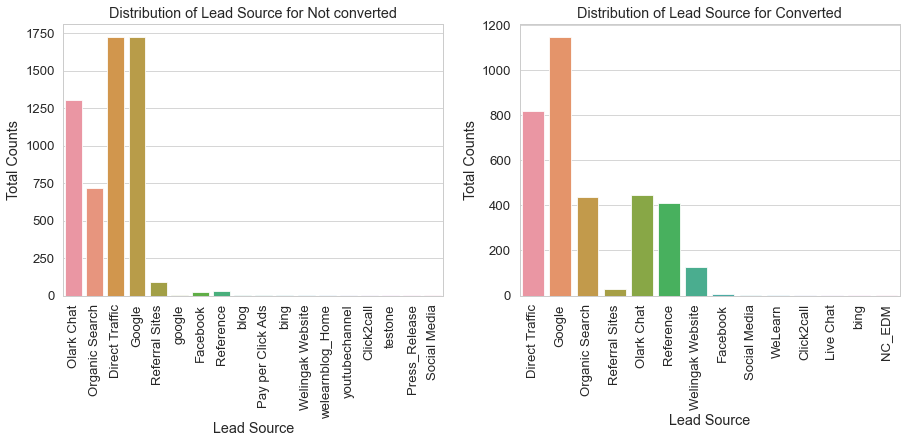

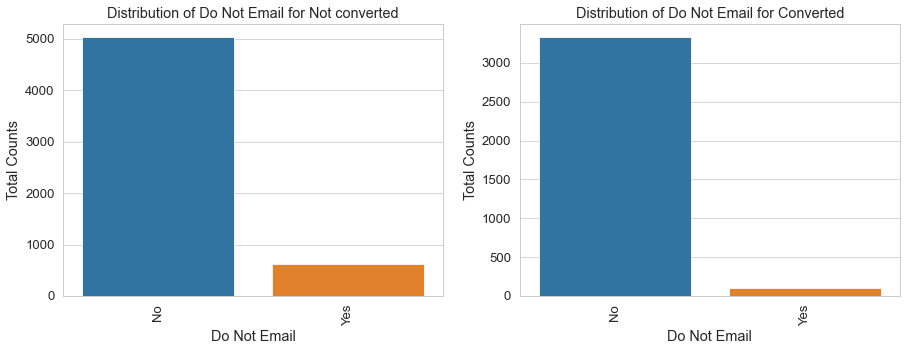

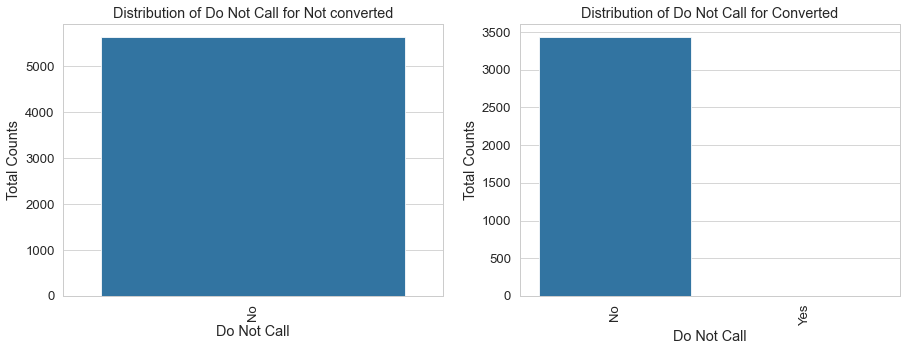

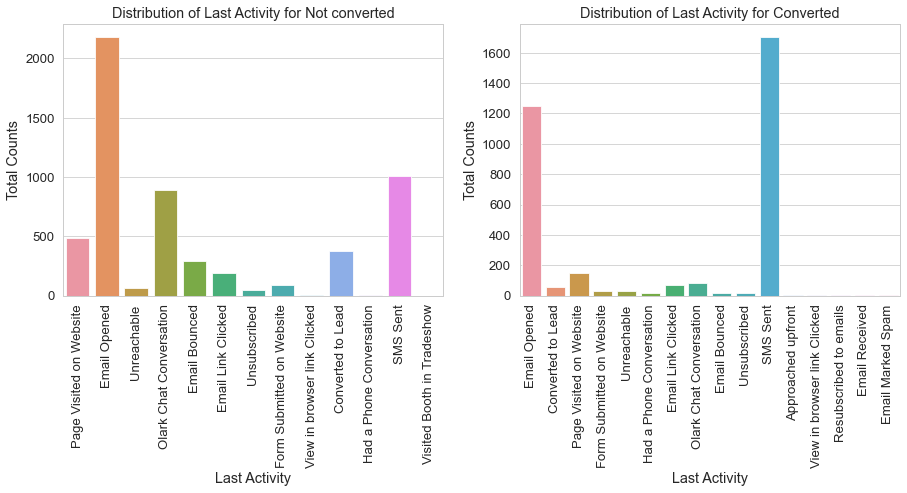

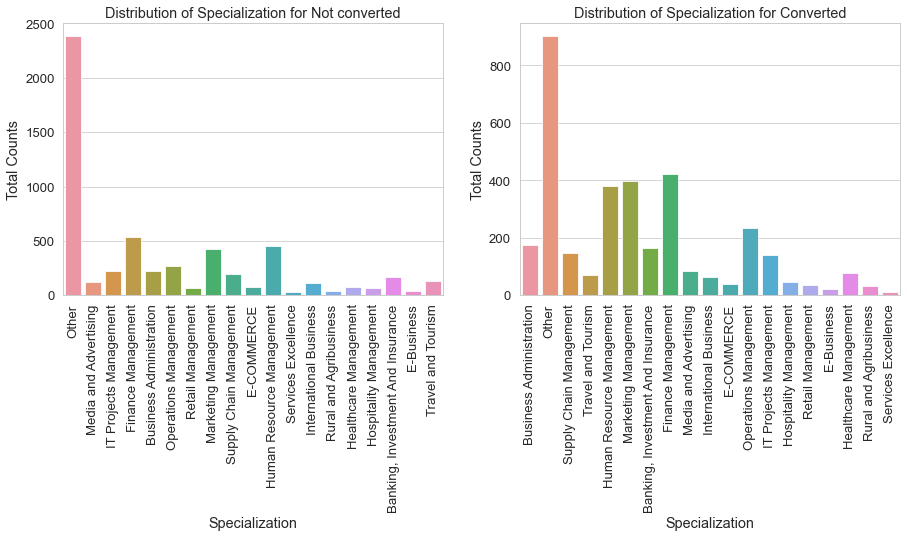

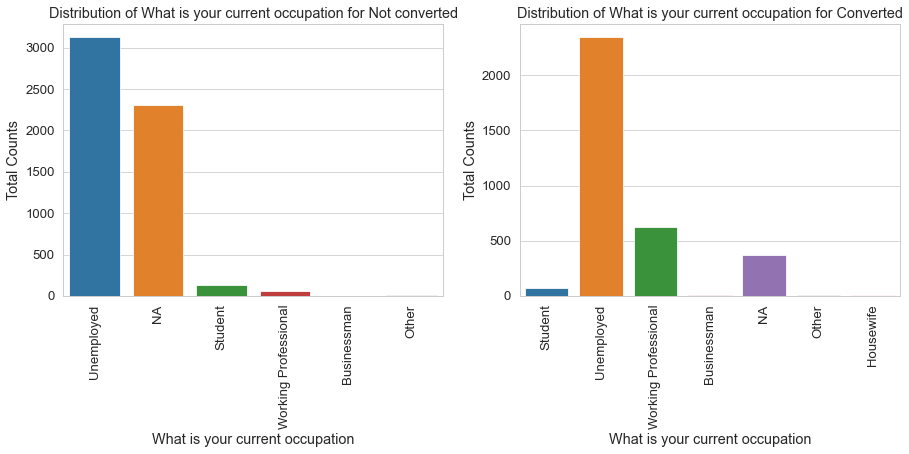

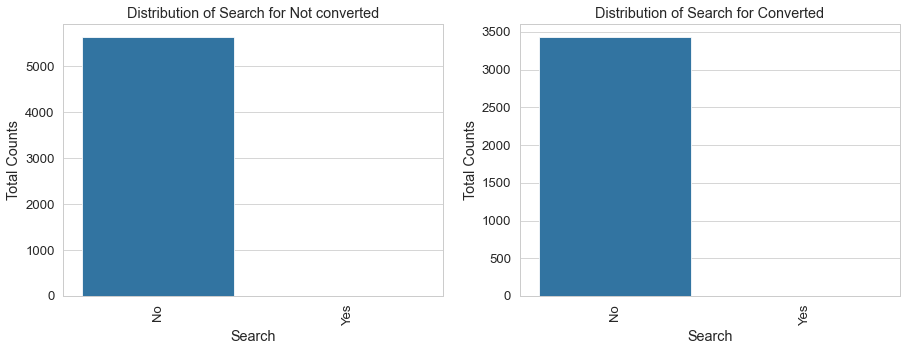

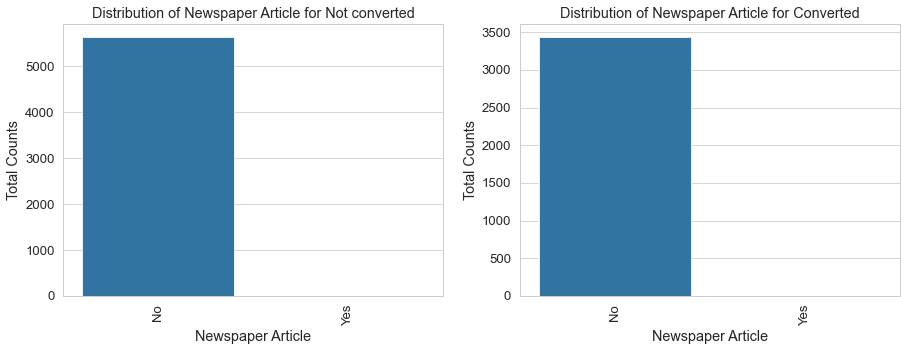

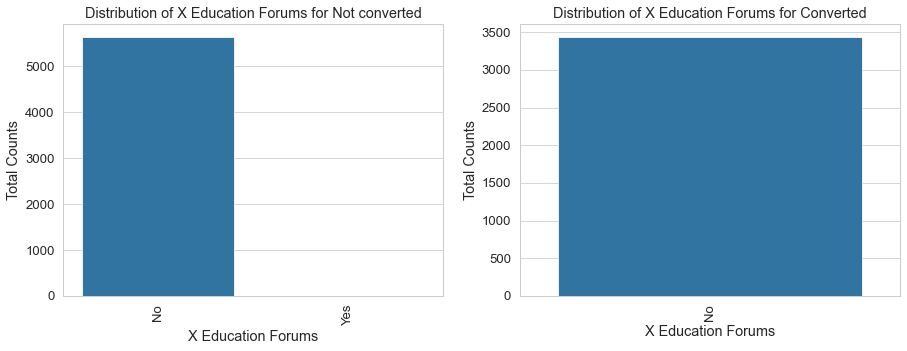

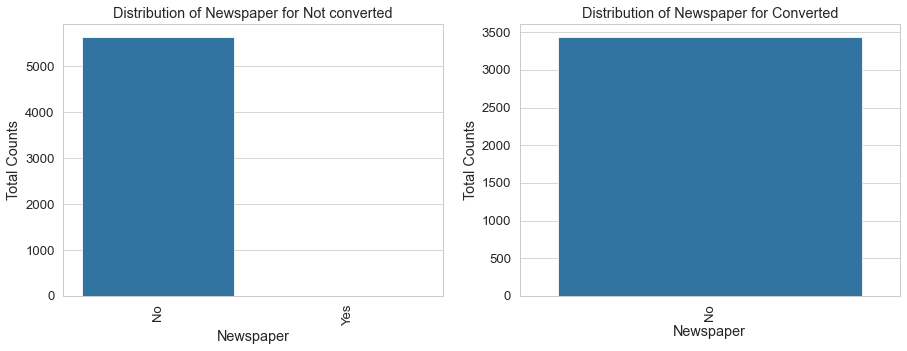

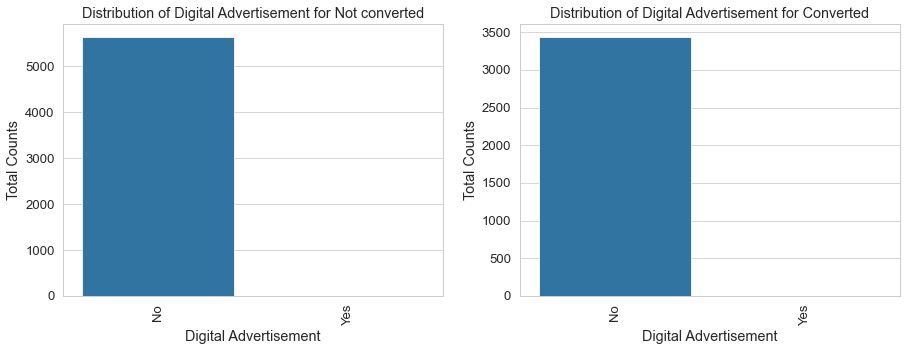

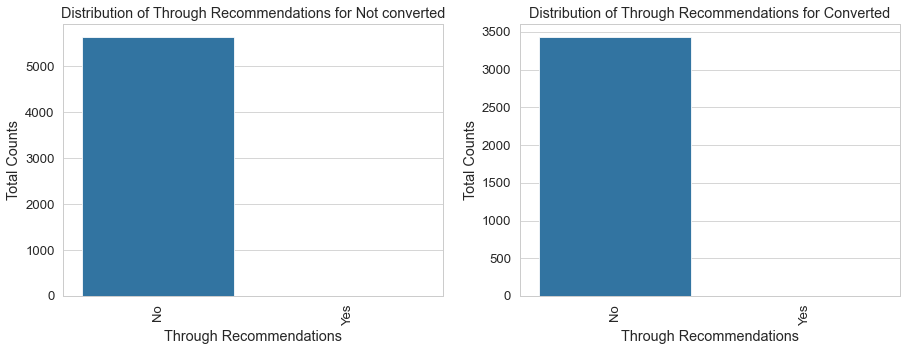

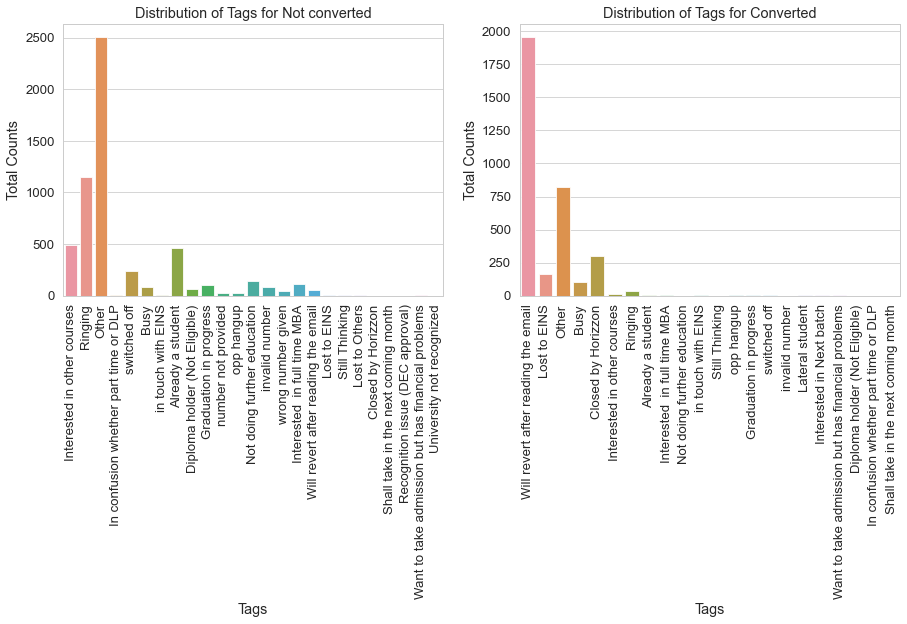

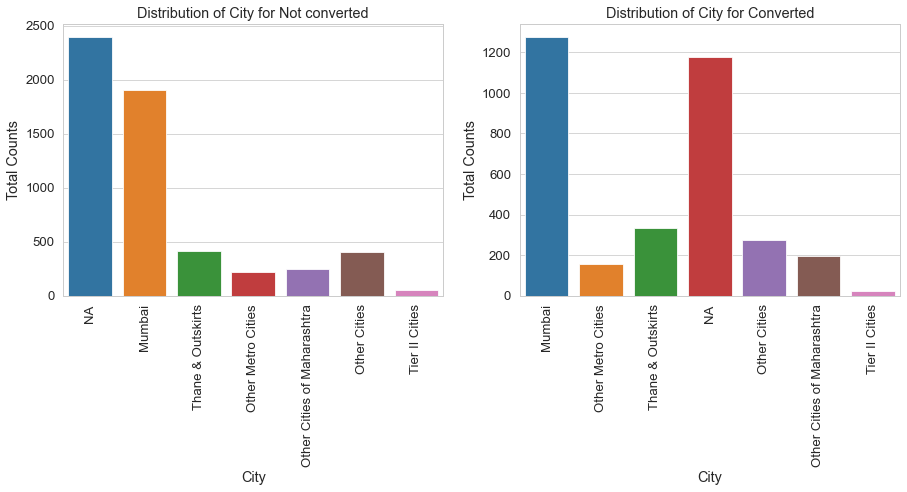

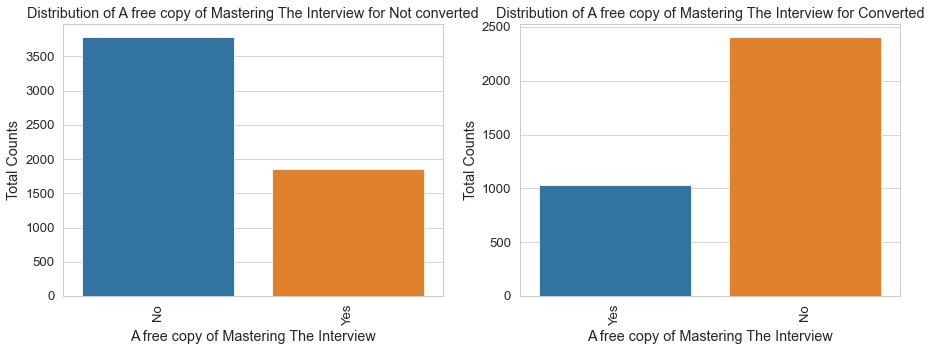

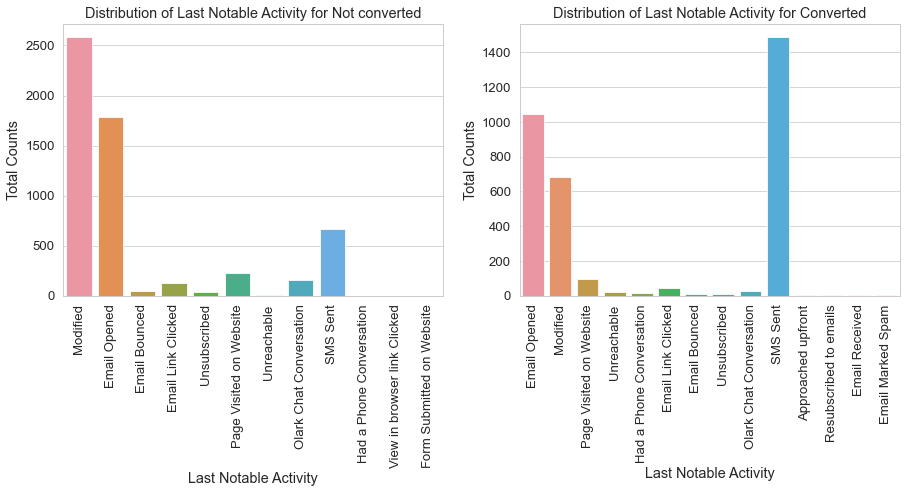

In [56]:
# Analysis of values distributed in each object column.
for i in obj_col:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
    sns.countplot(x=i, data=leads_base_0, ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {i} for Not converted')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    sns.countplot(x=i, data=leads_base_1, ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {i} for Converted')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

In [57]:
#Conversion Rates for Lead Origin
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='Lead Origin',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted                   0     1  total  Conversion Rate
Lead Origin                                                
API                      2463  1115   3578            31.16
Landing Page Submission  3118  1767   4885            36.17
Lead Add Form              37   544    581            93.63
Lead Import                21     9     30            30.00

In [58]:
#Conversion Rates for Lead Source
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='Lead Source',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted               0       1   total  Conversion Rate
Lead Source                                               
Click2call            1.0     3.0     4.0            75.00
Direct Traffic     1725.0   818.0  2543.0            32.17
Facebook             22.0     9.0    31.0            29.03
Google             1721.0  1147.0  2868.0            39.99
Live Chat             0.0     2.0     2.0           100.00
NC_EDM                0.0     1.0     1.0           100.00
Olark Chat         1305.0   448.0  1753.0            25.56
Organic Search      718.0   436.0  1154.0            37.78
Pay per Click Ads     1.0     0.0     1.0             0.00
Press_Release         2.0     0.0     2.0             0.00
Reference            33.0   410.0   443.0            92.55
Referral Sites       94.0    31.0   125.0            24.80
Social Media          1.0     1.0     2.0            50.00
WeLearn               0.0     1.0     1.0           100.00
Welingak Website      2.0   127.0   129.0            98.45
bing                  5.0     1.0     6.0            16.67
blog                  1.0     0.0     1.0             0.00
google                5.0     0.0     5.0             0.00
testone               1.0     0.0     1.0             0.00
welearnblog_Home      1.0     0.0     1.0             0.00
youtubechannel        1.0     0.0     1.0             0.00

In [59]:
#Conversion Rates for Do Not Email
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='Do Not Email',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted        0     1  total  Conversion Rate
Do Not Email                                    
No            5027  3331   8358            39.85
Yes            612   104    716            14.53

In [60]:
#Conversion Rates for Do Not Call
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='Do Not Call',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted         0       1   total  Conversion Rate
Do Not Call                                         
No           5639.0  3433.0  9072.0            37.84
Yes             0.0     2.0     2.0           100.00

In [61]:
#Conversion Rates for Last Activity
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='Last Activity',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted                          0       1   total  Conversion Rate
Last Activity                                                        
Approached upfront               0.0     5.0     5.0           100.00
Converted to Lead              374.0    54.0   428.0            12.62
Email Bounced                  296.0    16.0   312.0             5.13
Email Link Clicked             194.0    73.0   267.0            27.34
Email Marked Spam                0.0     2.0     2.0           100.00
Email Opened                  2182.0  1250.0  3432.0            36.42
Email Received                   0.0     2.0     2.0           100.00
Form Submitted on Website       88.0    28.0   116.0            24.14
Had a Phone Conversation         5.0    20.0    25.0            80.00
Olark Chat Conversation        888.0    84.0   972.0             8.64
Page Visited on Website        489.0   151.0   640.0            23.59
Resubscribed to emails           0.0     1.0     1.0           100.00
SMS Sent                      1011.0  1705.0  2716.0            62.78
Unreachable                     61.0    29.0    90.0            32.22
Unsubscribed                    45.0    14.0    59.0            23.73
View in browser link Clicked     5.0     1.0     6.0            16.67
Visited Booth in Tradeshow       1.0     0.0     1.0             0.00

In [62]:
#Conversion Rates via Specializations
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='Specialization',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted                             0    1  total  Conversion Rate
Specialization                                                      
Banking, Investment And Insurance   171  164    335            48.96
Business Administration             224  175    399            43.86
E-Business                           36   21     57            36.84
E-COMMERCE                           72   39    111            35.14
Finance Management                  537  422    959            44.00
Healthcare Management                80   76    156            48.72
Hospitality Management               66   45    111            40.54
Human Resource Management           457  380    837            45.40
IT Projects Management              226  140    366            38.25
International Business              114   62    176            35.23
Marketing Management                426  397    823            48.24
Media and Advertising               118   84    202            41.58
Operations Management               265  234    499            46.89
Other                              2381  901   3282            27.45
Retail Management                    66   34    100            34.00
Rural and Agribusiness               42   31     73            42.47
Services Excellence                  29   11     40            27.50
Supply Chain Management             198  148    346            42.77
Travel and Tourism                  131   71    202            35.15

In [63]:
#Conversion Rates via Occupation
summary=leads_base.pivot_table(values='Lead Number',columns='Converted',index='What is your current occupation',aggfunc='count').fillna(0)
summary['total']=summary[0]+summary[1]
summary['Conversion Rate']=round((summary[1]/summary['total'])*100,2)
summary

Converted                             0       1   total  Conversion Rate
What is your current occupation                                         
Businessman                         3.0     5.0     8.0            62.50
Housewife                           0.0     9.0     9.0           100.00
NA                               2313.0   370.0  2683.0            13.79
Other                               6.0     9.0    15.0            60.00
Student                           132.0    74.0   206.0            35.92
Unemployed                       3130.0  2346.0  5476.0            42.84
Working Professional               55.0   622.0   677.0            91.88

## Observations-:
1. Lead Origin-: Lead originated through Landing page submission and API are most likely to be not converted and highest no. of leads are generated via them.
2. Lead Source-: through Refernce leads are likely to converted
3. If lead prefer not be called or email are more likely to be not converted.
4. Those who have Other Specialisation/not filled up are likely to be not converted, therefore people with management specs are likely to be converted.
5. Unemployed are likely to be not converted, hence working professional are getting converted.
6. ['Search', 'Newspaper Article', 'X Education Forumns', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'] are more on the side of not getting converted, hence it can create a imbalance in prediction. Also these columns have one unique value of NO for converted leads and not converted leads. 
['A free copy of Mastering the Interview'] column is also not giving out much of the information.
Hence these columns need to be dropped as it can create a greater skewness in the data.
7. In last activity and Last notable activity with the lead is on Olark chat conversation then probably it will not convert else if it was by SMS sent then it might get convert into a hot lead. Hence probably we can take only one column from these two, and preferably the recent column is last notable activity. But in the column 'Last Notable Activity' data is getting skewed to SMS Sent, Email opened, Modified, therefore this needs to be dropped.
8. Tags-: These tags values are random and can be gneerated on situation, prefreably this do not pay any credit in prediction and hence can create blunder in model building. therefore, it needs to be dropped.
9. City-: It is not paying much information to the goal, as the company is based on online education one can enroll from anywhere despite of the city. Inspite of imputing NA for null values, whole data is getting skewed towards mumbai and NA. Therefore, it needs to get dropped.

In [64]:
pd.set_option('display.max_columns', 100)
leads_base.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                    Other   
1                   2.5             Email Opened                    Other   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                    Other   

  What is your current occupation Search Newspaper Article X Education Forums  \
0                      Unemployed     No                No                 No   
1                      Unemployed     No                No                 No   
2                         Student     No                No                 No   
3                      Unemployed     No                No                 No   
4                      Unemployed     No                No                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

                                  Tags    City  \
0          Interested in other courses      NA   
1                              Ringing      NA   
2  Will revert after reading the email  Mumbai   
3                              Ringing  Mumbai   
4  Will revert after reading the email  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [65]:
col = ['Do Not Call','Search', 'Newspaper Article','X Education Forums', 'Newspaper', 
       'Digital Advertisement','Through Recommendations','Tags','City', 
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [66]:
leads_base.drop(col,axis = 1, inplace = True)
len(leads_base.columns)

11

In [67]:
leads_base.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

## Outliers Treatment

In [68]:
leads_base.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
10%    586310.100000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
90%    650276.800000     1.000000     7.000000                  1373.000000   
95%    655344.450000     1.000000    10.000000                  1557.000000   
99%    659563.350000     1.000000    17.000000                  1839.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
10%                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

In [69]:
#Capping the data at 95% percetile value
Q6 = leads_base['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(leads_base[leads_base['TotalVisits'] >= Q6]))
leads_base.loc[leads_base['TotalVisits'] >= Q6, 'TotalVisits'] = Q6 # outlier capping

Q6 = leads_base['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(leads_base[leads_base['Page Views Per Visit'] >= Q6]))
leads_base.loc[leads_base['Page Views Per Visit'] >= Q6, 'Page Views Per Visit'] = Q6 # outlier capping


Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


In [70]:
#checking capped outliers
leads_base.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.191867                   482.887481   
std     23348.029512     0.485053     2.780618                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
10%    586310.100000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
90%    650276.800000     1.000000     7.000000                  1373.000000   
95%    655344.450000     1.000000    10.000000                  1557.000000   
99%    659563.350000     1.000000    10.000000                  1839.000000   
max    660737.000000     1.000000    10.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.265943  
std                1.790991  
min                0.000000  
10%                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
90%                5.000000  
95%                6.000000  
99%                6.000000  
max                6.000000

## Converting YES/NO to Binary values

In [71]:
# defining the function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [72]:
#applying the function to do not email column
leads_base['Do Not Email'] = leads_base[['Do Not Email']].apply(binary_map)

In [73]:
leads_base['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

In [74]:
# We should drop lead number as it is unique number/id given to each record and not useful in prediction.
leads_base.drop('Lead Number', axis =1, inplace = True)
len(leads_base.columns)

10

# Dummy Variable creation

In [75]:
obj_col_final = []
for i in leads_base.columns:
    if leads_base[i].dtype == 'object':
        obj_col_final.append(i)
obj_col_final

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation']

In [76]:
# We need to create dummy variables for all the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_base[['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
leads_base = pd.concat([leads_base, dummy1], axis=1)

In [77]:
leads_base

Lead Origin     Lead Source  Do Not Email  Converted  \
0                         API      Olark Chat             0          0   
1                         API  Organic Search             0          0   
2     Landing Page Submission  Direct Traffic             0          1   
3     Landing Page Submission  Direct Traffic             0          0   
4     Landing Page Submission          Google             0          1   
...                       ...             ...           ...        ...   
9235  Landing Page Submission  Direct Traffic             1          1   
9236  Landing Page Submission  Direct Traffic             0          0   
9237  Landing Page Submission  Direct Traffic             1          0   
9238  Landing Page Submission          Google             0          1   
9239  Landing Page Submission  Direct Traffic             0          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0             0.0                            0                  0.00   
1             5.0                          674                  2.50   
2             2.0                         1532                  2.00   
3             1.0                          305                  1.00   
4             2.0                         1428                  1.00   
...           ...                          ...                   ...   
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

                Last Activity             Specialization  \
0     Page Visited on Website                      Other   
1                Email Opened                      Other   
2                Email Opened    Business Administration   
3                 Unreachable      Media and Advertising   
4           Converted to Lead                      Other   
...                       ...                        ...   
9235        Email Marked Spam     IT Projects Management   
9236                 SMS Sent      Media and Advertising   
9237                 SMS Sent    Business Administration   
9238                 SMS Sent  Human Resource Management   
9239                 SMS Sent    Supply Chain Management   

     What is your current occupation  Lead Origin_Landing Page Submission  \
0                         Unemployed                                    0   
1                         Unemployed                                    0   
2                            Student                                    1   
3                         Unemployed                                    1   
4                         Unemployed                                    1   
...                              ...                                  ...   
9235                      Unemployed                                    1   
9236                      Unemployed                                    1   
9237                      Unemployed                                    1   
9238                              NA                                    1   
9239                      Unemployed                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238              

In [78]:
# We can drop the original variables form the df as we had created the dummies.
leads_base.drop(['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation'], axis=1, inplace=True)

In [79]:
leads_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 68 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 7   Lead Origin_Lead Import                               9074 non-null   uint8  
 8   Lead Source_Direct Traffic                            9074

<AxesSubplot:>

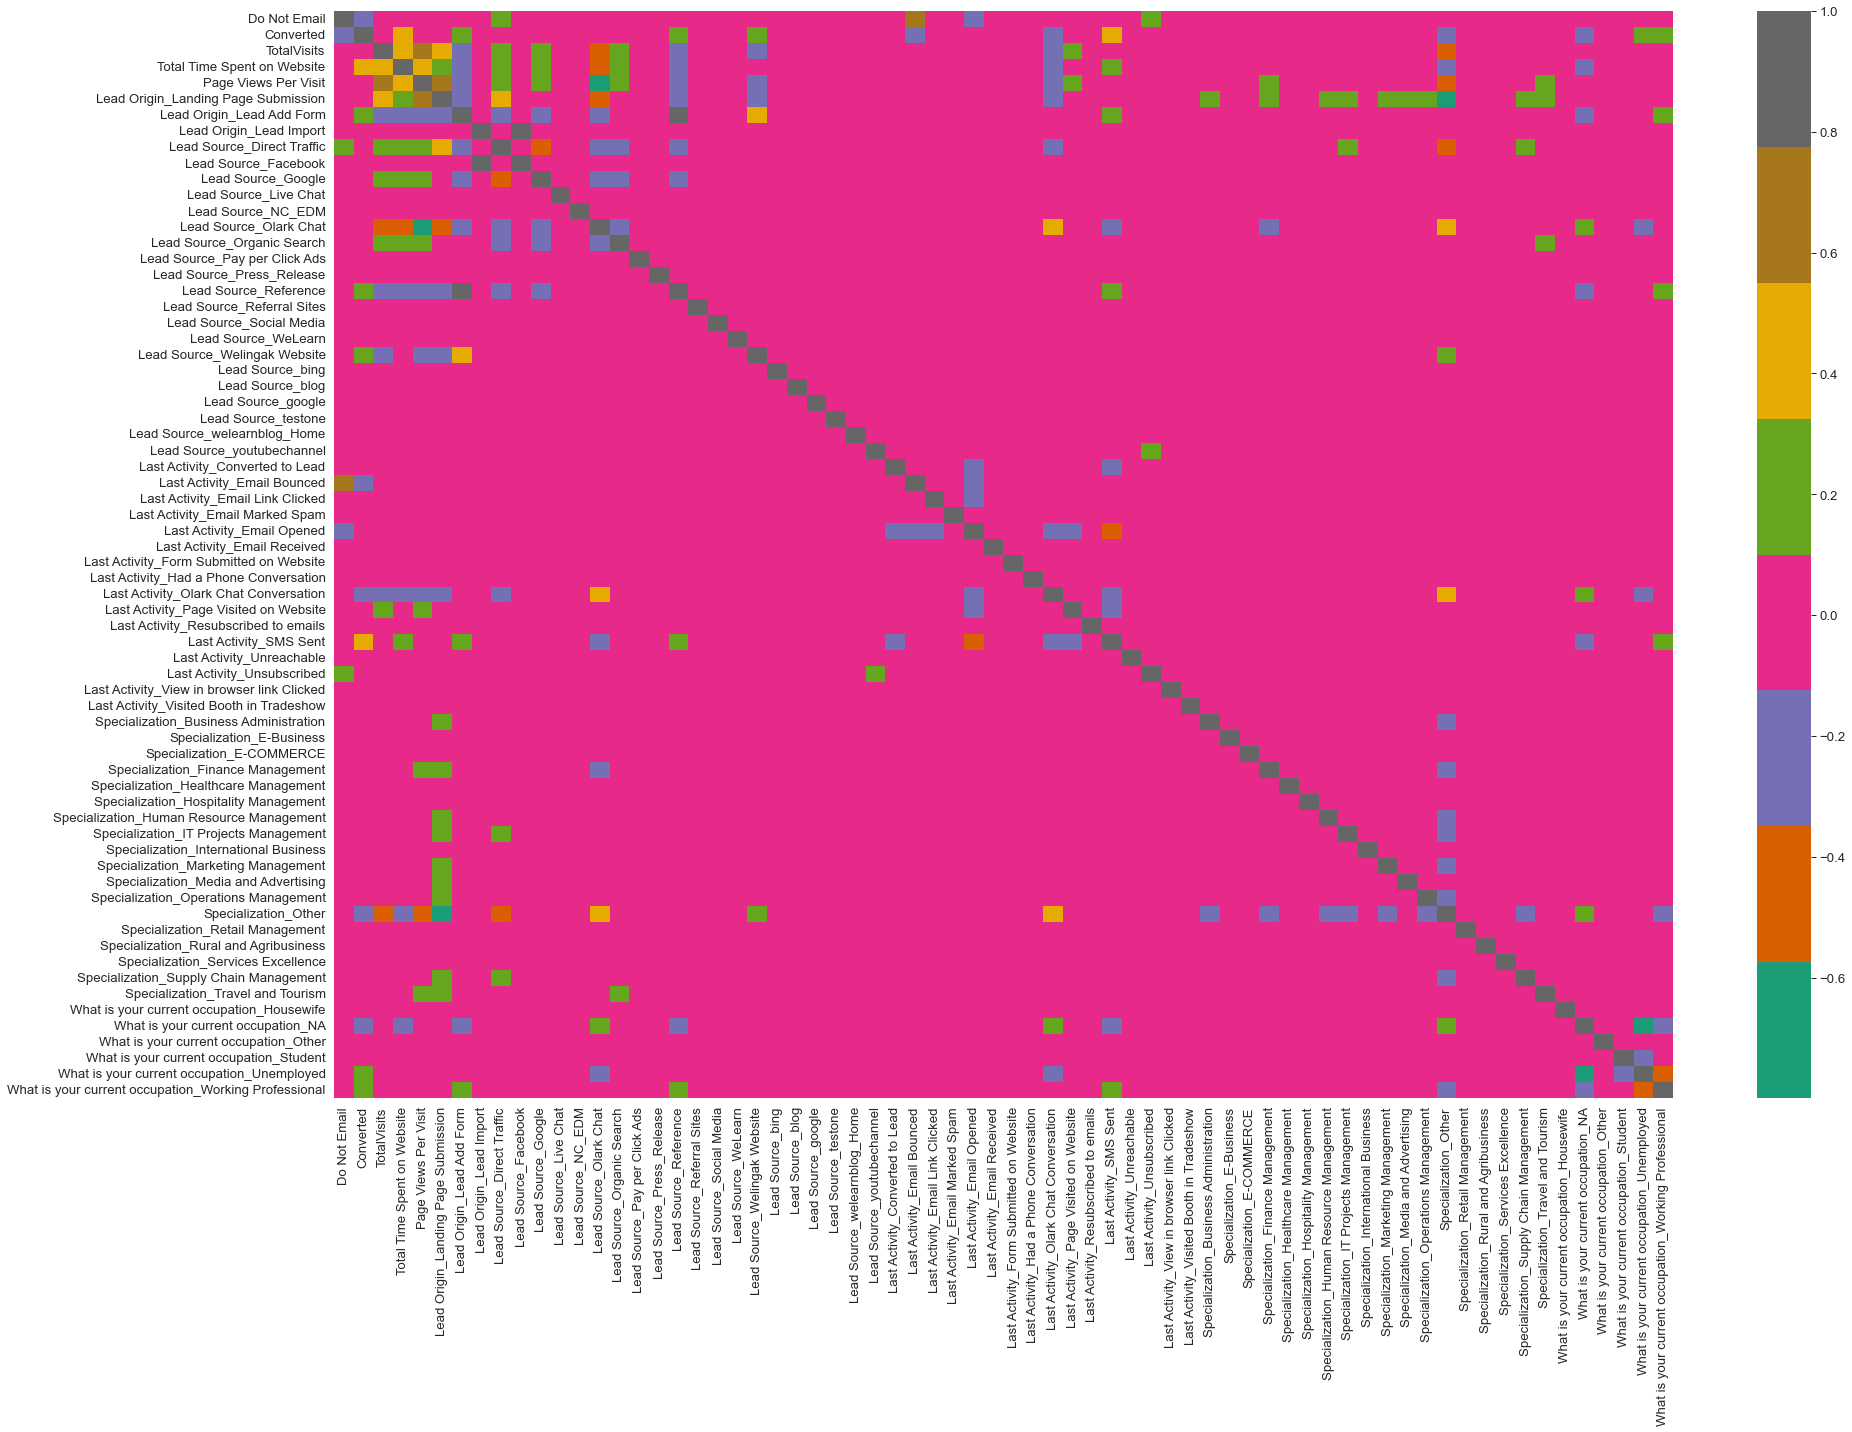

In [80]:
# visualising correlation between variables.
plt.figure(figsize=(30,20))
sns.heatmap(leads_base.corr(), cmap='Dark2')

# Top correlations with target variable
# Top Positive
1. 'What is your current occupation_Working professional' = 0.2
2. 'What is your current occupation_Unemployed' = 0.2
3. 'Last Activity_SMS Sent' = 0.4
4. 'Lead Source_Welingak website' = 0.2
5. 'Lead Source_Reference' = 0.2
6. 'Lead Origin_Lead Add Form' = 0.2
7. 'Total time Spent on Website' = 0.4

# Top Neagtives
1. 'What is your current occupation_NA' = -0.2
2. 'Specialization_Other' = -0.2
3. 'Last Activity_Olark Chat Conversation' = -0.2
4. 'Last Activity_Email Bounced' = -0.2
5. 'Do Not Email' = -0.2

In [81]:
# Train Test Split

In [82]:
X = leads_base.drop(['Converted'], axis=1)
y = leads_base['Converted']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [83]:
dfs = [X_train, X_test, y_train, y_test]
for i in dfs:
    print(i.shape)

(6351, 67)
(2723, 67)
(6351,)
(2723,)


## Feature Scaling

In [84]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
3009                           1                     0                   0   
1012                           1                     0                   0   
9226                           0                     0                   0   
4750                           1                     0                   0   
7987                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
3009                      0                   0                       0   
1012                      0                   0                       0   
9226                      0                   0                       1   
4750                      0                   0                       0   
7987                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
3009                           0                              0   
1012                           0                              0   
9226                           0                              0   
4750                           0                              0   
7987                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
3009                          0                      0   
1012                          0                      0   
9226                          0                      0   
4750                          0                      0   
7987                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
3009                           0                         0   
1012                           0                         0   
9226                           0                         0   
4750                           0                         0   
7987                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
3009                    0                             0                 0   
1012                    0                             0                 0   
9226                    0                             0                 0   
4750                    0                             0                 0   
7987                    0                             0                 0   

      Lead Source_blog  Lead Source_google  Lead Source_testone  \
3009                 0                   0                    0   
1012                 0                   0                    0   
9226                 0                   0                    0   
4750                 0                   0                    0   
7987          

# Model Building

In [85]:
import statsmodels.api as sm

##### Model-1 

In [86]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.4
Date:                Tue, 24 Jan 2023   Deviance:                       4974.8
Time:                        18:43:35   Pearson chi2:                 6.24e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4229
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   27.1396   3.34e+04      0.001      0.999   -6.54e+04    6.55e+04
Do Not Email                                            -1.5646      0.222     -7.049      0.000      -2.000      -1.130
TotalVisits                                              0.3264      0.057      5.772      0.000       0.216       0.437
Total Time Spent on Website                              1.1186      0.042     26.656      0.000       1.036       1.201
Page Views Per Visit                                    -0.3196      0.064     -5.021      0.000      -0.444      -0.195
Lead Origin_Landing Page Submission                     -0.7864      0.139     -5.643      0.000      -1.060      -0.513
Lead Origin_Lead Add Form                               -1.0337      1.524     -0.678      0.498      -4.021       1.953
Lead Origin_Lead Import                                 23.4076   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -2.7768      1.985     -1.399      0.162      -6.668       1.114
Lead Source_Facebook                                   -25.2815   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.4344      1.984     -1.227      0.220      -6.323       1.454
Lead Source_Live Chat                                   22.8466   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      21.8221   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.2958      1.976     -0.656      0.512      -5.169       2.578
Lead Source_Organic Search                              -2.6609      1.987     -1.339      0.181      -6.555       1.234
Lead Source_Pay per Click Ads                          -24.1834   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -23.2646   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.5673      1.283      1.222      0.222      -0.947       4.082
Lead Source_Referral Sites                              -2.7716      2.014     -1.376      0.169      -6.720       1.176
Lead Source_Social Media                                -0.8264      2.519     -0.328      0.743      -5.763       4.110
Lead Source_WeLearn                                  -2.575e-09   4.13e-06     -0.001      1.000    -8.1e-06    8.09e-06
Lead Source_Welingak Website                             4.0354      1.462      2.760      0.006       1.169       6.902
Lead Source_bing                                        -1

#### There are many columns which are having high p-Values. 
#### Hence manually eliminating one by one will be lengthy, so lets analyse and select the columns by recursive feature selection technique.
#### After that we will eliminate the columns on the basis of manual selection

## Feature Selection Using RFE

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [88]:
#importing RFE
from sklearn.feature_selection import RFE

rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 26),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 30),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Social Media', False, 23),
 ('Lead Source_WeLearn', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 42),
 ('Lead Source_blog', False, 35),
 ('Lead Source_google', False, 20),
 ('Lead Source_testone', False, 29),
 ('Lead Source_welea

In [91]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [92]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_View in browser link C

In [93]:
len(X_train.columns[~rfe.support_])

52

In [94]:
len(col)

15

##### Model-2 

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.9
Date:                Tue, 24 Jan 2023   Deviance:                       5091.8
Time:                        18:43:37   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1437      0.125     -1.153      0.249      -0.388       0.101
Do Not Email                                            -1.7971      0.185     -9.700      0.000      -2.160      -1.434
Total Time Spent on Website                              1.1116      0.041     27.132      0.000       1.031       1.192
Lead Origin_Landing Page Submission                     -1.0076      0.128     -7.859      0.000      -1.259      -0.756
Lead Origin_Lead Add Form                                3.0175      0.234     12.885      0.000       2.559       3.477
Lead Source_Olark Chat                                   1.2340      0.125      9.897      0.000       0.990       1.478
Lead Source_Welingak Website                             2.5089      0.756      3.317      0.001       1.027       3.991
Last Activity_Converted to Lead                         -1.2517      0.224     -5.585      0.000      -1.691      -0.812
Last Activity_Had a Phone Conversation                   2.6226      0.759      3.454      0.001       1.134       4.111
Last Activity_Olark Chat Conversation                   -1.3709      0.168     -8.147      0.000      -1.701      -1.041
Last Activity_SMS Sent                                   1.2727      0.076     16.712      0.000       1.123       1.422
Last Activity_Unsubscribed                               1.4019      0.473      2.965      0.003       0.475       2.329
Specialization_Other                                    -0.9283      0.126     -7.378      0.000      -1.175      -0.682
What is your current occupation_Housewife               22.6448   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_NA                      -1.2178      0.089    -13.647      0.000      -1.393      -1.043
What is your current occupation_Working Professional     2.4015      0.192     12.506      0.000       2.025       2.778
========================================================================================================================
"""

### We need to drop 'What is your current occupation_Housewife' column as it has high p-value > 0.05.
### let's check the VIF also

In [96]:
#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features



In [97]:
calculate_VIF(X_train_sm)

Features    VIF
0                                               const  13.36
3                 Lead Origin_Landing Page Submission   3.37
12                               Specialization_Other   3.01
4                           Lead Origin_Lead Add Form   1.91
5                              Lead Source_Olark Chat   1.89
6                        Lead Source_Welingak Website   1.38
2                         Total Time Spent on Website   1.33
9               Last Activity_Olark Chat Conversation   1.32
14                 What is your current occupation_NA   1.15
15  What is your current occupation_Working Profes...   1.15
10                             Last Activity_SMS Sent   1.14
1                                        Do Not Email   1.10
11                         Last Activity_Unsubscribed   1.07
7                     Last Activity_Converted to Lead   1.06
13          What is your current occupation_Housewife   1.01
8              Last Activity_Had a Phone Conversation   1.00

In [98]:
# We will first remove What is your current occupation_Housewife' column as it has high P-Value.

In [99]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [100]:
col2 = col.drop('What is your current occupation_Housewife')
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional'],
      dtype='object')

#### Model-3

In [101]:
X_train_sm2 = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.9
Date:                Tue, 24 Jan 2023   Deviance:                       5099.7
Time:                        18:43:37   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4114
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1367      0.124     -1.098      0.272      -0.381       0.107
Do Not Email                                            -1.8001      0.185     -9.717      0.000      -2.163      -1.437
Total Time Spent on Website                              1.1108      0.041     27.142      0.000       1.031       1.191
Lead Origin_Landing Page Submission                     -1.0075      0.128     -7.867      0.000      -1.258      -0.756
Lead Origin_Lead Add Form                                3.0311      0.234     12.957      0.000       2.573       3.490
Lead Source_Olark Chat                                   1.2327      0.125      9.889      0.000       0.988       1.477
Lead Source_Welingak Website                             2.4946      0.756      3.298      0.001       1.012       3.977
Last Activity_Converted to Lead                         -1.2563      0.224     -5.606      0.000      -1.695      -0.817
Last Activity_Had a Phone Conversation                   2.6169      0.759      3.446      0.001       1.129       4.105
Last Activity_Olark Chat Conversation                   -1.3734      0.168     -8.162      0.000      -1.703      -1.044
Last Activity_SMS Sent                                   1.2677      0.076     16.656      0.000       1.119       1.417
Last Activity_Unsubscribed                               1.3997      0.473      2.961      0.003       0.473       2.326
Specialization_Other                                    -0.9324      0.126     -7.415      0.000      -1.179      -0.686
What is your current occupation_NA                      -1.2201      0.089    -13.678      0.000      -1.395      -1.045
What is your current occupation_Working Professional     2.3965      0.192     12.480      0.000       2.020       2.773
========================================================================================================================
"""

In [102]:
calculate_VIF(X_train_sm2)

Features    VIF
0                                               const  13.34
3                 Lead Origin_Landing Page Submission   3.37
12                               Specialization_Other   3.01
4                           Lead Origin_Lead Add Form   1.91
5                              Lead Source_Olark Chat   1.89
6                        Lead Source_Welingak Website   1.38
2                         Total Time Spent on Website   1.33
9               Last Activity_Olark Chat Conversation   1.32
13                 What is your current occupation_NA   1.15
14  What is your current occupation_Working Profes...   1.15
10                             Last Activity_SMS Sent   1.14
1                                        Do Not Email   1.10
11                         Last Activity_Unsubscribed   1.07
7                     Last Activity_Converted to Lead   1.06
8              Last Activity_Had a Phone Conversation   1.00

In [103]:
#getting the predicted values on train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

3009    0.072940
1012    0.111049
9226    0.609244
4750    0.674541
7987    0.914097
1281    0.758020
2880    0.034114
4971    0.962523
7536    0.869891
1248    0.899112
dtype: float64

In [104]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07294029, 0.11104854, 0.60924437, 0.67454112, 0.91409668,
       0.75802029, 0.03411365, 0.96252318, 0.8698914 , 0.89911227])

#### Creating a dataframe with the actual churn flag and the predicted probabilities


In [105]:
y_train.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Converted_Prob
0          0        0.072940
1          0        0.111049
2          0        0.609244
3          1        0.674541
4          1        0.914097

In [107]:
# creating new column 'predicted' with 1 if Converted_prob > 1 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Predicted
0          0        0.072940          0
1          0        0.111049          0
2          0        0.609244          1
3          1        0.674541          1
4          1        0.914097          1

In [108]:
# Evaluation
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3456  449]
 [ 709 1737]]


In [109]:
# Predicted     not_churn    churn
# Actual
# not_churn        3456      449
# churn            709       1737  

In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8176665092111478


In [111]:
# we had achieved a good probability in our model 3

In [112]:
# Calculating other metrics also
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
Sensitivity = TP / float(TP+FN)
Sensitivity

0.7101390024529844

In [114]:
Specificity = TN / float(TN+FP)
Specificity

0.8850192061459667

In [115]:
False_positive_rate = FP/ float(TN+FP)
False_positive_rate

0.11498079385403329

In [116]:
Positive_predicted_value = TP / float(TP+FP)
Positive_predicted_value

0.7946020128087832

In [117]:
Negative_predicted_value = TN / float(TN+FN)
Negative_predicted_value

0.8297719087635054

## Plotting the ROC Curve

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )

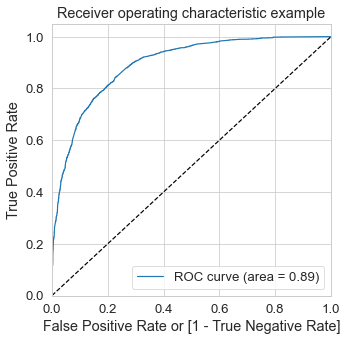

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [121]:
# We attain a good model with good metrics score and roc curve area

# Finding the optimal cut-off

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.072940          0    1    0    0    0    0    0    0   
1          0        0.111049          0    1    1    0    0    0    0    0   
2          0        0.609244          1    1    1    1    1    1    1    1   
3          1        0.674541          1    1    1    1    1    1    1    1   
4          1        0.914097          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probablity','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probablity  accuracy  sensitivity  specificity
0.0         0.0  0.385136     1.000000     0.000000
0.1         0.1  0.604944     0.986100     0.366197
0.2         0.2  0.766179     0.921913     0.668630
0.3         0.3  0.790112     0.878986     0.734443
0.4         0.4  0.811526     0.774325     0.834827
0.5         0.5  0.817667     0.710139     0.885019
0.6         0.6  0.809794     0.639820     0.916261
0.7         0.7  0.787120     0.532298     0.946735
0.8         0.8  0.760510     0.428046     0.968758
0.9         0.9  0.717367     0.286182     0.987452


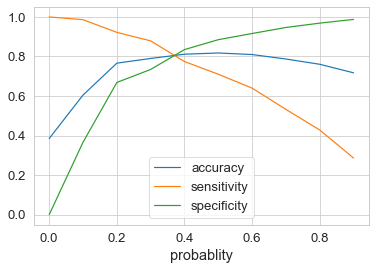

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

### From the curve above, ~0.4 (0.38 approx) is the optimum point to take it as a cutoff probability.


In [125]:
y_train_pred_final['final_predicted_0.38'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.072940          0    1    0    0    0    0    0    0   
1          0        0.111049          0    1    1    0    0    0    0    0   
2          0        0.609244          1    1    1    1    1    1    1    1   
3          1        0.674541          1    1    1    1    1    1    1    1   
4          1        0.914097          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted_0.38  
0    0    0    0                     0  
1    0    0    0                     0  
2    0    0    0                     1  
3    0    0    0                     1  
4    1    1    1                     1

In [126]:
y_train_pred_final['final_predicted_0.4'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.072940          0    1    0    0    0    0    0    0   
1          0        0.111049          0    1    1    0    0    0    0    0   
2          0        0.609244          1    1    1    1    1    1    1    1   
3          1        0.674541          1    1    1    1    1    1    1    1   
4          1        0.914097          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted_0.38  final_predicted_0.4  
0    0    0    0                     0                    0  
1    0    0    0                     0                    0  
2    0    0    0                     1                    1  
3    0    0    0                     1                    1  
4    1    1    1                     1                    1

In [127]:
# Let's check the overall accuracy.
A1 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted_0.38'])
round(A1, 3)

0.809

In [128]:
A2 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_predicted_0.4'])
round(A2, 3)

0.812

We are getting almost a similar acuracy in both the cutt-off.
But the cutt-off 0.4 has a greater accuracy when looked in detail.

# Precision and recal Trade-off

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

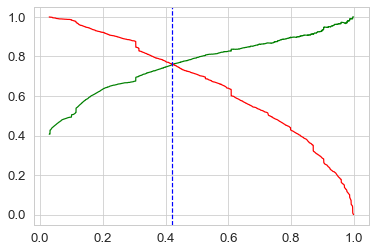

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, color='b', linestyle='--')
plt.show()

# Making predictions on Test Set

In [133]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3271             0     0.284772                    -0.600595   
1490             0     0.643547                     1.887326   
7936             0    -0.432779                    -0.752879   
4216             0    -1.150329                    -0.888650   
3830             0     1.719873                    -0.587751   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3271              0.955505                                    0   
1490              1.510766                                    1   
7936             -0.155018                                    0   
4216             -1.265540                                    0   
3830              2.066027                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3271                          0                        0   
1490                          0                        0   
7936                          0                        0   
4216                          1                        0   
3830                          0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
3271                           0                     0                   1   
1490                           1                     0                   0   
7936                           0                     0                   1   
4216                           0                     0                   0   
3830                           0                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
3271                      0                   0                       0   
1490                      0                   0                       0   
7936                      0                   0                       0   
4216                      0                   0                       0   
3830                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
3271                           0                              0   
1490                           0                              0   
7936                           0                              0   
4216                           0                              0   
3830                           1                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
3271                          0                      0   
1490                          0                      0   
7936                          0                      0   
4216                          0                      1   
3830                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
3271                           0                         0   
1490                           0                         0   
7936                           0                         0   
4216                           0                         0   
3830                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
3271                    0                             0                 0   
1490                    0                             0                 0   
7936                    0                             0                 0   
4216                    0                             0                 0   
3830                    0                             0                 0   

      Lead Source_blog  Lead Source_google  Lead Source_testone  \
3271                 0                   0                    0   
1490                 0                   0                    0   
7936                 0                   0                    0   
4216                 0                   0                    0   
3830          

In [134]:
X_test = X_test[col2]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3271             0                    -0.600595   
1490             0                     1.887326   
7936             0                    -0.752879   
4216             0                    -0.888650   
3830             0                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3271                                    0                          0   
1490                                    1                          0   
7936                                    0                          0   
4216                                    0                          1   
3830                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
3271                       0                             0   
1490                       0                             0   
7936                       0                             0   
4216                       0                             0   
3830                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Had a Phone Conversation  \
3271                                0                                       0   
1490                                0                                       0   
7936                                0                                       0   
4216                                0                                       0   
3830                                0                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      Last Activity_Unsubscribed  Specialization_Other  \
3271                           0                     1   
1490                           0                     0   
7936                           0                     1   
4216                           0                     0   
3830                           0                     0   

      What is your current occupation_NA  \
3271                                   1   
1490                                   0   
7936                                   1   
4216                                   0   
3830                                   1   

      What is your current occupation_Working Professional  
3271                                                  0     
1490                                                  1     
7936                                                  0     
4216                                                  0     
3830                                                  0

In [135]:
len(X_test.columns)

14

In [136]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)


In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
y_pred_final

Converted         0
3271          0  0.049433
1490          1  0.966065
7936          0  0.042063
4216          1  0.870710
3830          0  0.046652
...         ...       ...
850           0  0.051262
2879          0  0.100907
6501          1  0.864974
7155          0  0.090967
376           0  0.069569

[2723 rows x 2 columns]

In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probablity'})

In [142]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Probablity.map(lambda x: 1 if x > 0.42 else 0)

In [143]:
y_pred_final

Converted  Converted_Probablity  final_predicted
3271          0              0.049433                0
1490          1              0.966065                1
7936          0              0.042063                0
4216          1              0.870710                1
3830          0              0.046652                0
...         ...                   ...              ...
850           0              0.051262                0
2879          0              0.100907                0
6501          1              0.864974                1
7155          0              0.090967                0
376           0              0.069569                0

[2723 rows x 3 columns]

In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8211531399192068

In [145]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1478,  256],
       [ 231,  758]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
Sensitivity_test =  TP / float(TP+FN)
Sensitivity_test

0.7664307381193124

In [148]:
Specificity_test = TN / float(TN+FP)
Specificity_test

0.8523644752018454

# we got the increased precision and recall values on our test dataset.

In [149]:
# Looking at the ROC Curve

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, 
                                         y_pred_final.Converted_Probablity, drop_intermediate = False )

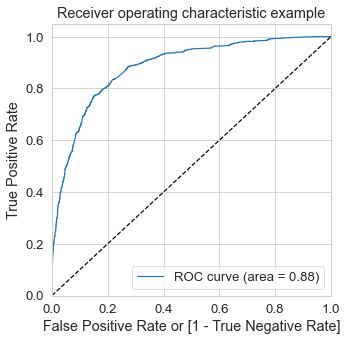

In [151]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Probablity)

### We had not got the much difference in Area under ROC Curve between training and testing data
> - For training -: 0.89
> - For testing -: 0.88

# Model Summary

In [152]:
# summary of model_3
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.9
Date:                Tue, 24 Jan 2023   Deviance:                       5099.7
Time:                        18:43:39   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4114
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1367      0.124     -1.098      0.272      -0.381       0.107
Do Not Email                                            -1.8001      0.185     -9.717      0.000      -2.163      -1.437
Total Time Spent on Website                              1.1108      0.041     27.142      0.000       1.031       1.191
Lead Origin_Landing Page Submission                     -1.0075      0.128     -7.867      0.000      -1.258      -0.756
Lead Origin_Lead Add Form                                3.0311      0.234     12.957      0.000       2.573       3.490
Lead Source_Olark Chat                                   1.2327      0.125      9.889      0.000       0.988       1.477
Lead Source_Welingak Website                             2.4946      0.756      3.298      0.001       1.012       3.977
Last Activity_Converted to Lead                         -1.2563      0.224     -5.606      0.000      -1.695      -0.817
Last Activity_Had a Phone Conversation                   2.6169      0.759      3.446      0.001       1.129       4.105
Last Activity_Olark Chat Conversation                   -1.3734      0.168     -8.162      0.000      -1.703      -1.044
Last Activity_SMS Sent                                   1.2677      0.076     16.656      0.000       1.119       1.417
Last Activity_Unsubscribed                               1.3997      0.473      2.961      0.003       0.473       2.326
Specialization_Other                                    -0.9324      0.126     -7.415      0.000      -1.179      -0.686
What is your current occupation_NA                      -1.2201      0.089    -13.678      0.000      -1.395      -1.045
What is your current occupation_Working Professional     2.3965      0.192     12.480      0.000       2.020       2.773
========================================================================================================================
"""

# Final Equation-: 

>logit(p) = log(p/(1-p)) = (-1.8 * Do Not Email) + (1.11 * Total Time Spent on Website) + (-1.00 * Lead Origin_Landing Page 
Submission) + (3.03 * Lead Origin_Lead Add Form) + (1.23 * Lead Source_Olark Chat) + (2.49 * Lead Source_Welingak Website) + (-1.26 * Last Activity_Converted to Lead) + (2.62 * Last Activity_Had a Phone Conversation) + (-1.37 * Last Activity_Olark Chat Conversation) + (1.27 * Last Activity_SMS Sent) + (1.40 * Last Activity_Unsubscribed) + (-0.93 * Specialization_Other) + (-1.22 * What is your current occupation_NA) + (2.40 * What is your current occupation_Working Professional) -0.1367

------------------------------------------------End Of Project------------------------------------------------------------------